# Book chapter - Self-Organizing Maps - Scenario 1 - Full features

#### source: https://github.com/JustGlowing/minisom

# 1. Import

In [58]:
from google.colab import files
uploaded = files.upload()

Saving minisom.py to minisom (1).py
time: 14.1 s


In [59]:
from google.colab import files
uploaded2 = files.upload()

Saving dataset_joined.csv to dataset_joined (1).csv
time: 46 s


In [60]:
import sys
sys.path.insert(0, '../')

import math
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import *
import seaborn as sns
sns.set()

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 13.5 ms


In [61]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.26 s


## Read CSV

In [62]:
df = pd.read_csv('dataset_joined.csv', sep=',', encoding = "UTF-8")

time: 209 ms


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Verify import

In [63]:
df.head()

,UniqueIDDataset,UniqueIDRow,SCLink,System,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Acetochlor,Atrazine,Ciat,Ceat,Dimethenamid,Stage,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,BatchNumber,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError
0,1,1,Farm,2,24.4,22.4,84.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Farm,2,22.9,21.5,88.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,Farm,2,26.6,23.3,75.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Farm,2,22.6,21.4,89.0,36.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,Farm,2,22.4,21.3,90.0,36.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 74.4 ms


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36351 entries, 0 to 36350
Data columns (total 42 columns):
UniqueIDDataset            36351 non-null int64
UniqueIDRow                36351 non-null int64
SCLink                     36351 non-null object
System                     36351 non-null int64
Temperature                22489 non-null float64
TemperatureHumid           19175 non-null float64
RelativeHumidity           23149 non-null float64
WindDirection              20520 non-null float64
WindVelocity               20518 non-null float64
LotNumber                  1537 non-null float64
Acetochlor                 184 non-null object
Atrazine                   184 non-null object
Ciat                       184 non-null object
Ceat                       184 non-null object
Dimethenamid               184 non-null object
Stage                      250 non-null object
Defoliation                250 non-null float64
Reproductive               250 non-null float64
Bolls                

In [65]:
df.describe()

,UniqueIDDataset,UniqueIDRow,System,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError
count,36351.000000,36351.000000,36351.000000,22489.000000,19175.000000,23149.000000,20520.000000,20518.000000,1537.000000,250.000000,250.000000,250.000000,250.000000,250.000000,125.000000,432.00000,671.000000,465.000000,1998.000000,1999.000000,1998.000000,1998.000000,1998.000000,1997.000000,1998.000000,1998.000000,14287.000000,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000,12288.000000
mean,3.431487,7938.134384,2.398393,24.040672,19.498154,62.482943,15.553655,1.993545,105.464541,50.000000,4.112000,3.912000,69.224000,14.908000,25.779840,496.11331,1.527571,14.532129,-86.147292,2.796471,96.946765,20.736383,-95.416907,36.649044,0.022839,0.055271,3.780150,-0.113236,0.000012,-835919.878337,886.997007,46516.192464,1373.244194,0.634156
std,2.840264,5779.083632,0.525929,4.256546,2.763787,21.374480,12.488792,1.650432,106.291708,35.426263,1.149234,1.292648,8.276947,1.761804,6.831864,415.67746,0.499612,6.041447,10.161517,16.187693,3.717591,17.168584,3.078773,86.948962,0.040996,0.262014,2.035875,0.408600,0.038929,29288.666806,1295.032421,32570.780305,631.174696,0.114129
min,1.000000,1.000000,1.000000,8.400000,1.700000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,43.000000,10.000000,4.735000,10.17000,1.000000,6.000000,-92.500000,0.000000,85.500000,0.585600,-109.290000,0.000000,0.004285,0.000000,1.000000,-2.843960,-0.599982,-884747.000000,-954.437256,11127.000000,-25.043488,-0.086025
25%,1.000000,2776.500000,2.000000,21.200000,17.700000,48.000000,5.000000,1.000000,30.000000,25.000000,3.000000,3.000000,63.000000,14.000000,22.560000,182.07500,1.000000,9.700000,-89.542000,0.451390,94.525250,8.459175,-97.333000,0.421910,0.011037,0.015378,2.000000,-0.344438,-0.009893,-852347.000000,-127.029419,19583.250000,736.276001,0.610809
50%,1.000000,7320.000000,2.000000,23.500000,20.100000,64.000000,14.000000,2.000000,67.000000,50.000000,4.000000,4.000000,70.000000,15.000000,26.994000,339.88500,2.000000,13.250000,-88.752500,1.007900,97.021500,14.251500,-96.000000,4.918000,0.014945,0.020292,4.000000,-0.183299,-0.000074,-838818.000000,497.817993,35097.000000,1392.412964,0.653197
75%,7.000000,11864.000000,3.000000,27.000000,21.500000,80.000000,27.000000,3.000000,149.000000,75.000000,5.000000,5.000000,74.875000,16.000000,30.010000,728.58500,2.000000,17.800000,-88.021000,1.483000,98.872000,30.007000,-94.150250,52.381000,0.021213,0.029886,5.000000,0.292760,0.010476,-816100.500000,1991.271973,67492.750000,2003.471802,0.692448
max,7.000000,20527.000000,3.000000,38.800000,30.000000,100.000000,36.000000,17.000000,432.000000,100.000000,8.000000,8.000000,92.000000,20.000000,38.320000,2037.63000,2.000000,57.500000,-17.212000,377.350000,107.150000,168.580000,-85.082000,1867.900000,0.584290,4.739800,10.000000,0.632072,0.367500,-783498.000000,3570.556641,113597.000000,2742.251953,0.962216


time: 183 ms


# 2. Dataprep

## Transform to numbers

In [66]:
def extractValues(df, categoryName, categoryMap):
    categories = df[categoryName]
    numCat = categories.map(categoryMap)
    data = df.drop(columns=categoryName)
    
    return data, numCat

time: 2.5 ms


In [67]:
# obs: definir a estratégia do que fazer com essas colunas quando for para valer

def dropColumns(data, columns):
    for col in columns:
        data = data.drop(columns=col)  
        
    return data
    

time: 2 ms


In [68]:
def fillNans(data, strategy):
    if strategy=='ZERO':
        data = data.fillna(0)
    elif strategy=='MIN':
        data = data.fillna(-999)
    elif strategy=='MAX':
        data = data.fillna(999)
    elif strategy=='INTER':
        data = data.interpolate(method='linear', limit_direction='backward', axis=0)
        data = data.interpolate(method='linear', limit_direction='forward', axis=0)

    return data

time: 4.83 ms


## Fix acetochlor

In [69]:
#Acetochlor
df.Acetochlor.replace(to_replace="<.05", value=0.05, inplace=True)

time: 5.25 ms


In [70]:
df["AcetocNum"] = pd.to_numeric(df['Acetochlor'])

time: 5.37 ms


## Fix stage

In [71]:
le = preprocessing.LabelEncoder()

time: 1.18 ms


In [72]:
df['Stage'].fillna("nan",inplace=True)

time: 4.01 ms


In [73]:
df['Stage'].unique()

array(['nan', 'vegetative', 'flowerbud', 'blossom', 'boll', 'bollopen'],
      dtype=object)

time: 5.27 ms


In [74]:
le.fit(df['Stage'])

LabelEncoder()

time: 3.67 ms


In [75]:
le.classes_

array(['blossom', 'boll', 'bollopen', 'flowerbud', 'nan', 'vegetative'],
      dtype=object)

time: 2.85 ms


In [76]:
df['StageNum'] = le.transform(df['Stage'])

time: 8.01 ms


In [77]:
df['StageNum'].unique()

array([4, 5, 3, 0, 1, 2])

time: 3.54 ms


## Fix sclink number

In [78]:
le3 = preprocessing.LabelEncoder()

time: 1.1 ms


In [79]:
df['SCLinkNum'] = le3.fit_transform(df['SCLink'])

time: 8.59 ms


In [80]:
df.head()

,UniqueIDDataset,UniqueIDRow,SCLink,System,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Acetochlor,Atrazine,Ciat,Ceat,Dimethenamid,Stage,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,BatchNumber,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError,AcetocNum,StageNum,SCLinkNum
0,1,1,Farm,2,24.4,22.4,84.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,1,2,Farm,2,22.9,21.5,88.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
2,1,3,Farm,2,26.6,23.3,75.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
3,1,4,Farm,2,22.6,21.4,89.0,36.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
4,1,5,Farm,2,22.4,21.3,90.0,36.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


time: 107 ms


## Fix batch number

In [81]:
#BatchNumber
le2 = preprocessing.LabelEncoder()

time: 1.23 ms


In [82]:
df['BatchNumber'].fillna("nan",inplace=True)

time: 4.83 ms


In [83]:
df['BatchNumber'].unique()

array(['nan', '8553FA02', '7162EG01', '4819CJ01', '8581FK05', '5066FL01',
       '7858GP03', '1609GN01', '9566GC01', '7922GR01', '9534EO01',
       '3625CF01', '1424FK01', '378FK01', '7375CB01', '7796EK03',
       '8361EH01', '8010EJ03', '2081GA03', '3876EX01', '8728EL02',
       '1074FL01', '2344FP01', '2480FH01', '4840FR01', '6330FT02',
       '487GH01', '8438CG03', '804FK01', '9592EG01', '6960CT03',
       '3063EV01', '4643FK02', '5238FK01', '6866GL01', '1929FR03',
       '5920FF01', '2328FG03', '2203FS01', '1623FS01', '2441FP01',
       '3063EU01', '4623EZ01', '6612FJ03', '1557GC01', '2256EN01',
       '2371CE04', '8020EJ03', '3756EY01', '972FP02', '9621FL02',
       '9750FN01', '6091EH01', '5869FB01', '5691FN01', '7323FA01',
       '1423FK01', '9FE01', '2182CU03', '6312GC01', '3063GC01',
       '9275GC01', '6573GL01', '2739FL01', '2773BH01', '1437FK01',
       '1256FL01', '6392EJ01', '7066EU02', '6692CB01', '5366EQ01',
       '8581FK03', '2666FG03', '8010EJ01', '6116FP01', '7356CL

time: 5.95 ms


In [84]:
le2.fit(df['BatchNumber'])

LabelEncoder()

time: 3.99 ms


In [85]:
le2.classes_

array(['1009GS01', '1073FL01', '1073GS01', '1074FL01', '1086FK02',
       '1131FJ01', '11JG8350', '122CG01', '1256FL01', '1277GA01',
       '1379FT01', '1423FK01', '1424FK01', '142FK01', '1437FK01',
       '1440ET02', '1450FG01', '1450GU01', '1522GN01', '1557GC01',
       '15FC06', '1609GN01', '1623FS01', '1735HH07', '1740HH01',
       '1740HH07', '1757GV02', '1802FY01', '1846FG01', '1929FR03',
       '1934CK09', '1986FK01', '1987GF01', '2013GP01', '2023HH07',
       '2025HH07', '2027HH07', '2081GA03', '209FC01', '2116FG02',
       '217EJ04', '2182CU03', '2203FS01', '220FT01', '2256EN01',
       '2283EY01', '2301FS01', '2305BC01', '2325FP01', '2328FG03',
       '2341FP01', '2342FP01', '2344FP01', '2345EG01', '2371CE04',
       '2441FP01', '2455EJ01', '2473FE01', '2480FH01', '2535FP01',
       '2658AI01', '2659GP01', '2665FG01', '2665FG03', '2666FG01',
       '2666FG02', '2666FG03', '2666fg03', '269EG02', '269EJ02',
       '2739FL01', '2766FL07', '2773BH01', '2951GY01', '2984EN01',
    

time: 3.44 ms


In [86]:
df['BatchNum'] = le2.transform(df['BatchNumber'])

time: 7.84 ms


In [87]:
df['BatchNum'].unique()

array([275, 238, 190, 127, 242, 137, 214,  21, 259, 216, 258,  86,  12,
        89, 197, 210, 234, 219,  37,  93, 247,   3,  52,  58, 129, 167,
       132, 235, 223, 260, 183,  77, 122, 140, 181,  29, 155,  49,  42,
        22,  55,  76, 121, 175,  19,  44,  54, 221,  88, 265, 262, 268,
       159, 154, 150, 193,  11, 274,  41, 165,  78, 253, 174,  70,  72,
        14,   8, 170, 187, 177, 142, 241,  66, 218, 162, 195,  56, 209,
        32,  80, 217,  94, 115, 135,  20, 164, 136,  43, 246, 130,  51,
        84, 191, 194, 123, 206,  79, 248,  27, 236, 232,  71, 243, 103,
         4,  45, 254, 224, 213, 118, 188, 245,  57, 227,  81, 143, 239,
        31, 124, 173, 255, 180,  30,   6, 189, 100, 249,  97, 138, 228,
       240,   7,  68, 203, 117, 270, 178, 101, 233,  83, 147, 273,  73,
        16, 192, 120, 144,  46, 119, 146, 244, 116, 149,  62, 108, 231,
        75,  53,  74, 272,  63,   5, 215, 104, 257, 114, 182, 264,  38,
        98,  91,  48, 109, 153,  15,  82, 201, 237, 212, 269, 16

time: 5.17 ms


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36351 entries, 0 to 36350
Data columns (total 46 columns):
UniqueIDDataset            36351 non-null int64
UniqueIDRow                36351 non-null int64
SCLink                     36351 non-null object
System                     36351 non-null int64
Temperature                22489 non-null float64
TemperatureHumid           19175 non-null float64
RelativeHumidity           23149 non-null float64
WindDirection              20520 non-null float64
WindVelocity               20518 non-null float64
LotNumber                  1537 non-null float64
Acetochlor                 184 non-null object
Atrazine                   184 non-null object
Ciat                       184 non-null object
Ceat                       184 non-null object
Dimethenamid               184 non-null object
Stage                      36351 non-null object
Defoliation                250 non-null float64
Reproductive               250 non-null float64
Bolls              

## Drop text columns

In [89]:
columns = ["SCLink","UniqueIDDataset","UniqueIDRow","System","Atrazine","Ciat","Ceat","Dimethenamid","Acetochlor","Stage","BatchNumber","SCLinkNum"]
data = dropColumns(df, columns)

time: 87.8 ms


## Remove nans

In [90]:
data = fillNans(data, "ZERO")

time: 24 ms


In [91]:
data.head()

,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError,AcetocNum,StageNum,BatchNum
0,24.4,22.4,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
1,22.9,21.5,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
2,26.6,23.3,75.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
3,22.6,21.4,89.0,36.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
4,22.4,21.3,90.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275


time: 79.8 ms


In [92]:
data.columns

Index(['Temperature', 'TemperatureHumid', 'RelativeHumidity', 'WindDirection',
       'WindVelocity', 'LotNumber', 'Defoliation', 'Reproductive', 'Bolls',
       'Height', 'Nodes', 'Weight', 'Yield', 'Destination', 'Defective',
       'MeanSignalStrength', 'StdSignalStrength', 'MeanLinkQuality',
       'StdLinkQuality', 'MeanNoiseFloor', 'StdNoiseFloor', 'StdTemperature',
       'StdRH', 'Machine', 'pCutTorque', 'pCutLagError', 'pCutActualPosition',
       'pCutActualSpeed', 'pSvolFilmActualPosition', 'pSvolFilmActualSpeed',
       'pSvolFilmLagError', 'AcetocNum', 'StageNum', 'BatchNum'],
      dtype='object')

time: 3.92 ms


## Scale data

In [93]:
sc = MinMaxScaler(feature_range = (0, 1))

def standardization(data, f):
    if f=="scale":
        data = scale(data)
    elif f=='minmax':
        data = sc.fit_transform(data)
    
    return data

time: 2.92 ms


In [94]:
data.head()

,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError,AcetocNum,StageNum,BatchNum
0,24.4,22.4,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
1,22.9,21.5,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
2,26.6,23.3,75.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
3,22.6,21.4,89.0,36.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
4,22.4,21.3,90.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275


time: 72.7 ms


In [95]:
data.columns

Index(['Temperature', 'TemperatureHumid', 'RelativeHumidity', 'WindDirection',
       'WindVelocity', 'LotNumber', 'Defoliation', 'Reproductive', 'Bolls',
       'Height', 'Nodes', 'Weight', 'Yield', 'Destination', 'Defective',
       'MeanSignalStrength', 'StdSignalStrength', 'MeanLinkQuality',
       'StdLinkQuality', 'MeanNoiseFloor', 'StdNoiseFloor', 'StdTemperature',
       'StdRH', 'Machine', 'pCutTorque', 'pCutLagError', 'pCutActualPosition',
       'pCutActualSpeed', 'pSvolFilmActualPosition', 'pSvolFilmActualSpeed',
       'pSvolFilmLagError', 'AcetocNum', 'StageNum', 'BatchNum'],
      dtype='object')

time: 3.51 ms


## Create full features scenarios (all features) - sc1

## sc1 inputs

In [96]:
dfsc1 = data[['Temperature', 'TemperatureHumid', 'RelativeHumidity', 'WindDirection',
       'WindVelocity', 'LotNumber', 'Defoliation', 'Reproductive', 'Bolls',
       'Height', 'Nodes', 'Weight', 'Yield', 'Destination', 'Defective',
       'MeanSignalStrength', 'StdSignalStrength', 'MeanLinkQuality',
       'StdLinkQuality', 'MeanNoiseFloor', 'StdNoiseFloor', 'StdTemperature',
       'StdRH', 'Machine', 'pCutTorque', 'pCutLagError', 'pCutActualPosition',
       'pCutActualSpeed', 'pSvolFilmActualPosition', 'pSvolFilmActualSpeed',
       'pSvolFilmLagError', 'AcetocNum', 'StageNum', 'BatchNum']].copy()

time: 13.5 ms


In [97]:
del data

time: 988 µs


In [98]:
dfsc1.head()

,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError,AcetocNum,StageNum,BatchNum
0,24.4,22.4,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
1,22.9,21.5,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
2,26.6,23.3,75.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
3,22.6,21.4,89.0,36.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
4,22.4,21.3,90.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275


time: 59.1 ms


In [99]:
data = dfsc1.copy()

time: 5.36 ms


In [100]:
data.head()

,Temperature,TemperatureHumid,RelativeHumidity,WindDirection,WindVelocity,LotNumber,Defoliation,Reproductive,Bolls,Height,Nodes,Weight,Yield,Destination,Defective,MeanSignalStrength,StdSignalStrength,MeanLinkQuality,StdLinkQuality,MeanNoiseFloor,StdNoiseFloor,StdTemperature,StdRH,Machine,pCutTorque,pCutLagError,pCutActualPosition,pCutActualSpeed,pSvolFilmActualPosition,pSvolFilmActualSpeed,pSvolFilmLagError,AcetocNum,StageNum,BatchNum
0,24.4,22.4,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
1,22.9,21.5,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
2,26.6,23.3,75.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
3,22.6,21.4,89.0,36.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275
4,22.4,21.3,90.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,275


time: 60.5 ms


In [101]:
data.shape

(36351, 34)

time: 4.94 ms


## Targets

In [102]:
target_system = df[['System']].copy()

time: 4.27 ms


In [103]:
target_system.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36351 entries, 0 to 36350
Data columns (total 1 columns):
System    36351 non-null int64
dtypes: int64(1)
memory usage: 284.1 KB
time: 5.25 ms


In [104]:
target_system.head()

,System
0,2
1,2
2,2
3,2
4,2


time: 8.72 ms


# 3. Model building and implementation

## SC1 with target = system

## Model building

In [105]:
%autoreload 2

def execute(gridX, gridY, numberAttributes, sigmaValue, rate, function, runs, data):
    som = MiniSom(gridX, gridY, numberAttributes, sigma=sigmaValue,
              learning_rate=rate, neighborhood_function=function)
    som.pca_weights_init(data)
    
    som.train_random(data, runs, verbose=False)
    
    return som

time: 3.72 ms


In [106]:
numCat = df['System']

time: 1.07 ms


In [107]:
numCat

0        2
1        2
2        2
3        2
4        2
        ..
36346    3
36347    3
36348    3
36349    3
36350    3
Name: System, Length: 36351, dtype: int64

time: 4.57 ms


In [108]:
def plotResults():
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(data, numCat):  # scatterplot
        w = som.winner(x)
        wmap[w] = im

        plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
        im = im + 1
    
    plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
    plt.show()

time: 5.71 ms


In [109]:
data, numCat = extractValues(df, "SCLink", {'Farm': 1, 'Industry': 2, 'Transportation': 3})

columns = ["UniqueIDDataset","UniqueIDRow","System","Atrazine","Ciat","Ceat","Dimethenamid","Acetochlor","Stage","BatchNumber"]
data = dropColumns(data, columns)    

data = fillNans(data, "ZERO")

data = standardization(data, "minmax")

columnsNum = np.size(data,1)

time: 165 ms


In [110]:
def findCluster(coord):
    centroids = [[cent1X,cent1Y],[cent2X,cent2Y],[cent3X,cent3Y]]
    cluster = None
    distanceW = 10000
    for i in range(len(centroids)):
        
        c = centroids[i]
        distance = math.sqrt(((coord[0]-c[0])**2)+((coord[1]-c[1])**2) )
        if distance<distanceW:
            distanceW = distance
            cluster = i+1
    return cluster

def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length


time: 7.52 ms


In [111]:
labels_true = []
labels_pred = []

def generateInfo():
  for x, t in zip(coord, numCat):  
    labels_true.append(t)
    labels_pred.append(findCluster(x))

time: 2.58 ms


In [112]:
def printResults(id, t1,t0,labels_true,labels_pred,coord,numCat,report):
    print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (id, (t1-t0),
                 metrics.homogeneity_score(labels_true, labels_pred),
                 metrics.completeness_score(labels_true, labels_pred),
                 metrics.v_measure_score(labels_true, labels_pred),
                 metrics.adjusted_rand_score(labels_true, labels_pred),
                 #metrics.adjusted_mutual_info_score(labels_true,  labels_pred,average_method='arithmetic'),
                 metrics.precision_score(labels_true, labels_pred,average='weighted'),
                 metrics.silhouette_score(coord, numCat, metric='sqeuclidean')))
    if report==True:
        print("Confusion matrix\n",metrics.confusion_matrix(labels_true, labels_pred)   ) 
        print("Classification report\n",metrics.classification_report(labels_true, labels_pred)   ) 

time: 5.59 ms


In [113]:
def run(gridX,gridY,columnsNum,s,l,f,i,data):
    arr1 = []
    arr2 = []
    arr3 = []
    cat1 = []
    cat2 = []
    cat3 = []
    coord = []

    t0 = time()
    som = execute(gridX,gridY,columnsNum, s, l, f, i, data)
    t1 = time()

    for x, t in zip(data, numCat):  # scatterplot
            w = som.winner(x)
            coord.append(w)
            if t==1:
                arr1.append(w)
                cat1.append(t)
            elif t==2:
                arr2.append(w)
                cat2.append(t)
            elif t==3:
                arr3.append(w)
                cat3.append(t)
        
    cent1X, cent1Y = centeroidnp(np.asarray(arr1))
    cent2X, cent2Y  = centeroidnp(np.asarray(arr2))
    cent3X, cent3Y  = centeroidnp(np.asarray(arr3))
    return coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som

time: 12 ms


## Results analysis

## Hyperparameters analysis (5x to calculate average)

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [0]:
!cat /proc/meminfo

MemTotal:       13335188 kB
MemFree:         8192264 kB
MemAvailable:   12377840 kB
Buffers:          107492 kB
Cached:          2034876 kB
SwapCached:            0 kB
Active:           933908 kB
Inactive:        3952692 kB
Active(anon):     527384 kB
Inactive(anon):      312 kB
Active(file):     406524 kB
Inactive(file):  3952380 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               852 kB
Writeback:             0 kB
AnonPages:       2744324 kB
Mapped:           278396 kB
Shmem:               848 kB
Slab:             166084 kB
SReclaimable:     135252 kB
SUnreclaim:        30832 kB
KernelStack:        3648 kB
PageTables:        10796 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667592 kB
Committed_AS:    6273860 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:   2134016 kB
ShmemHugePages:  

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   28G   75G  28% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1       114G   30G   85G  27% /etc/hosts
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
time: 3.98 s


In [0]:
func = ['triangle', 'gaussian'] 
learn = [0.1, 0.2, 0.5]
sigmas = [2, 3, 5, 10]
inter = [100, 500, 1000, 5000]
print("Running...")
print('init\t\t\ttime\thomo\tcompl\tv-meas\tARI\tprecision\tsilhouette')
for f in func:
    for l in learn:
        for s in sigmas:
            for i in inter:
                id = f + "," + str(l) + "," + str(s) + "," + str(i)
                arr1 = []
                arr2 = []
                arr3 = []
                cat1 = []
                cat2 = []
                cat3 = []
                coord = []
                cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None
                t0 = time()
                coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
                t1 = time()
                labels_true = []
                labels_pred = []
                generateInfo()
                #print(coord)
                
                printResults(report=False, id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)
                
print("Finish!")                


Running...
init			time	homo	compl	v-meas	ARI	precision	silhouette
triangle,0.1,2,100	67.95s	0.693	0.518	0.593	0.563	0.919	0.489
triangle,0.1,2,500	69.85s	0.764	0.570	0.653	0.706	0.982	0.355
triangle,0.1,2,1000	73.16s	0.820	0.636	0.716	0.781	0.984	0.272
triangle,0.1,2,5000	100.64s	0.783	0.573	0.662	0.684	0.983	0.044
triangle,0.1,3,100	67.14s	0.813	0.626	0.708	0.769	0.984	0.313
triangle,0.1,3,500	70.27s	0.848	0.668	0.747	0.815	0.984	0.182
triangle,0.1,3,1000	73.07s	0.585	0.451	0.509	0.593	0.918	0.338
triangle,0.1,3,5000	100.37s	0.811	0.639	0.715	0.799	0.977	0.243
triangle,0.1,5,100	67.56s	0.721	0.572	0.638	0.726	0.962	0.289
triangle,0.1,5,500	70.21s	0.301	0.223	0.256	0.331	0.821	0.077
triangle,0.1,5,1000	73.02s	0.366	0.270	0.311	0.394	0.760	-0.162
triangle,0.1,5,5000	100.37s	0.436	0.326	0.373	0.493	0.876	-0.088
triangle,0.1,10,100	67.19s	0.556	0.413	0.474	0.532	0.918	0.202
triangle,0.1,10,500	69.85s	0.669	0.544	0.600	0.726	0.946	0.313
triangle,0.1,10,1000	72.80s	0.712	0.519	0.600	0.624	0

/content/minisom.py:248: RuntimeWarning: overflow encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in add
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


triangle,0.5,10,5000	99.73s	-0.000	1.000	-0.000	0.000	0.346	0.000
gaussian,0.1,2,100	67.04s	0.699	0.665	0.682	0.744	0.935	0.473
gaussian,0.1,2,500	69.20s	0.626	0.522	0.569	0.649	0.929	0.296
gaussian,0.1,2,1000	73.41s	0.863	0.695	0.770	0.843	0.984	0.308
gaussian,0.1,2,5000	100.03s	0.481	0.370	0.418	0.518	0.899	0.079
gaussian,0.1,3,100	67.27s	0.714	0.673	0.693	0.745	0.937	0.458
gaussian,0.1,3,500	69.45s	0.584	0.488	0.532	0.642	0.926	0.399
gaussian,0.1,3,1000	72.98s	0.434	0.355	0.391	0.503	0.868	0.316
gaussian,0.1,3,5000	99.53s	0.668	0.503	0.574	0.653	0.928	0.257
gaussian,0.1,5,100	67.07s	0.680	0.653	0.666	0.737	0.928	0.582
gaussian,0.1,5,500	69.31s	0.808	0.620	0.702	0.764	0.984	0.311
gaussian,0.1,5,1000	72.61s	0.779	0.576	0.662	0.697	0.981	0.228
gaussian,0.1,5,5000	99.03s	0.526	0.416	0.465	0.558	0.907	0.186
gaussian,0.1,10,100	68.40s	0.675	0.647	0.660	0.734	0.931	0.660
gaussian,0.1,10,500	69.82s	0.847	0.675	0.751	0.822	0.985	0.345
gaussian,0.1,10,1000	73.73s	0.800	0.603	0.688	0.735	0.984

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


mexican_hat,0.1,2,100	67.30s	0.242	0.305	0.270	0.124	0.216	-0.173


KeyboardInterrupt: ignored

time: 2h 22min 22s


In [0]:
func = ['triangle', 'gaussian'] 
learn = [0.1, 0.2, 0.5]
sigmas = [2, 3, 5, 10]
inter = [100, 500, 1000, 5000]
print("Running...")
print('init\t\t\ttime\thomo\tcompl\tv-meas\tARI\tprecision\tsilhouette')
for f in func:
    for l in learn:
        for s in sigmas:
            for i in inter:
                id = f + "," + str(l) + "," + str(s) + "," + str(i)
                arr1 = []
                arr2 = []
                arr3 = []
                cat1 = []
                cat2 = []
                cat3 = []
                coord = []
                cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None
                t0 = time()
                coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
                t1 = time()
                labels_true = []
                labels_pred = []
                generateInfo()
                #print(coord)
                
                printResults(report=False, id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)
                
print("Finish!")                


Running...
init			time	homo	compl	v-meas	ARI	precision	silhouette
triangle,0.1,2,100	67.78s	0.675	0.630	0.652	0.733	0.933	0.762
triangle,0.1,2,500	70.45s	0.646	0.563	0.602	0.690	0.933	0.108
triangle,0.1,2,1000	74.16s	0.833	0.654	0.733	0.797	0.984	0.285
triangle,0.1,2,5000	101.12s	0.441	0.324	0.374	0.441	0.895	-0.054
triangle,0.1,3,100	69.38s	0.812	0.628	0.709	0.778	0.983	0.429
triangle,0.1,3,500	70.90s	0.528	0.426	0.472	0.587	0.914	0.211
triangle,0.1,3,1000	74.02s	0.591	0.473	0.525	0.608	0.930	0.196
triangle,0.1,3,5000	101.54s	0.531	0.418	0.468	0.580	0.914	0.228
triangle,0.1,5,100	67.42s	0.449	0.359	0.399	0.519	0.882	0.117
triangle,0.1,5,500	70.62s	0.415	0.317	0.359	0.452	0.870	0.065
triangle,0.1,5,1000	74.74s	0.734	0.567	0.640	0.731	0.956	0.302
triangle,0.1,5,5000	100.98s	0.665	0.483	0.560	0.616	0.962	0.008
triangle,0.1,10,100	67.89s	0.617	0.437	0.512	0.532	0.948	0.175
triangle,0.1,10,500	69.75s	0.792	0.569	0.662	0.659	0.983	-0.042
triangle,0.1,10,1000	73.59s	0.641	0.459	0.534	0.571	0

/content/minisom.py:248: RuntimeWarning: overflow encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in add
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


triangle,0.5,10,5000	102.12s	-0.000	1.000	-0.000	0.000	0.346	0.000
gaussian,0.1,2,100	68.52s	0.714	0.672	0.693	0.744	0.937	0.613
gaussian,0.1,2,500	69.74s	0.625	0.515	0.565	0.639	0.929	0.242
gaussian,0.1,2,1000	73.77s	0.811	0.651	0.722	0.813	0.975	0.372
gaussian,0.1,2,5000	100.36s	0.671	0.512	0.581	0.669	0.941	0.290
gaussian,0.1,3,100	67.45s	0.597	0.608	0.602	0.705	0.914	0.581
gaussian,0.1,3,500	70.13s	0.593	0.489	0.536	0.633	0.930	0.262
gaussian,0.1,3,1000	73.03s	0.807	0.626	0.705	0.779	0.982	0.315
gaussian,0.1,3,5000	100.15s	0.765	0.598	0.671	0.750	0.947	0.307
gaussian,0.1,5,100	67.24s	0.714	0.673	0.693	0.745	0.937	0.377
gaussian,0.1,5,500	69.99s	0.559	0.449	0.498	0.596	0.923	0.257
gaussian,0.1,5,1000	73.19s	0.745	0.554	0.636	0.695	0.978	0.232
gaussian,0.1,5,5000	100.71s	0.397	0.317	0.353	0.465	0.854	0.250
gaussian,0.1,10,100	66.54s	0.604	0.628	0.616	0.708	0.917	0.704
gaussian,0.1,10,500	69.85s	0.824	0.640	0.720	0.783	0.984	0.323
gaussian,0.1,10,1000	72.79s	0.825	0.642	0.722	0.786	0.

In [0]:
func = ['triangle', 'gaussian'] 
learn = [0.1, 0.2, 0.5]
sigmas = [2, 3, 5, 10]
inter = [100, 500, 1000, 5000]
print("Running...")
print('init\t\t\ttime\thomo\tcompl\tv-meas\tARI\tprecision\tsilhouette')
for f in func:
    for l in learn:
        for s in sigmas:
            for i in inter:
                id = f + "," + str(l) + "," + str(s) + "," + str(i)
                arr1 = []
                arr2 = []
                arr3 = []
                cat1 = []
                cat2 = []
                cat3 = []
                coord = []
                cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None
                t0 = time()
                coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
                t1 = time()
                labels_true = []
                labels_pred = []
                generateInfo()
                #print(coord)
                
                printResults(report=False, id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)
                
print("Finish!")                


Running...
init			time	homo	compl	v-meas	ARI	precision	silhouette
triangle,0.1,2,100	68.85s	0.710	0.651	0.679	0.728	0.935	0.634
triangle,0.1,2,500	71.77s	0.819	0.631	0.713	0.769	0.984	0.430
triangle,0.1,2,1000	75.11s	0.828	0.646	0.726	0.788	0.984	0.244
triangle,0.1,2,5000	101.51s	0.863	0.698	0.772	0.844	0.985	0.429
triangle,0.1,3,100	68.21s	0.871	0.716	0.786	0.860	0.985	0.492
triangle,0.1,3,500	71.55s	0.767	0.587	0.665	0.737	0.975	0.297
triangle,0.1,3,1000	76.09s	0.560	0.453	0.501	0.629	0.913	0.316
triangle,0.1,3,5000	101.97s	0.784	0.588	0.672	0.722	0.984	0.051
triangle,0.1,5,100	69.28s	0.410	0.298	0.345	0.401	0.894	-0.224
triangle,0.1,5,500	71.56s	0.455	0.345	0.393	0.483	0.891	0.141
triangle,0.1,5,1000	75.41s	0.380	0.294	0.331	0.436	0.853	0.180
triangle,0.1,5,5000	100.86s	0.345	0.254	0.293	0.363	0.843	0.067
triangle,0.1,10,100	69.04s	0.769	0.564	0.651	0.678	0.975	0.104
triangle,0.1,10,500	72.56s	0.351	0.264	0.301	0.394	0.846	0.115
triangle,0.1,10,1000	75.80s	0.861	0.701	0.773	0.837	0.

/content/minisom.py:248: RuntimeWarning: overflow encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in add
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


triangle,0.5,10,5000	100.06s	-0.000	1.000	-0.000	0.000	0.346	0.000
gaussian,0.1,2,100	68.62s	0.707	0.669	0.688	0.744	0.936	0.688
gaussian,0.1,2,500	71.55s	0.630	0.530	0.576	0.655	0.928	0.284
gaussian,0.1,2,1000	75.00s	0.496	0.399	0.442	0.551	0.897	0.219
gaussian,0.1,2,5000	101.83s	0.699	0.523	0.599	0.678	0.963	0.197
gaussian,0.1,3,100	68.74s	0.711	0.672	0.691	0.745	0.937	0.513
gaussian,0.1,3,500	70.45s	0.579	0.460	0.513	0.591	0.928	0.211
gaussian,0.1,3,1000	74.02s	0.397	0.320	0.355	0.467	0.852	0.251
gaussian,0.1,3,5000	100.37s	0.421	0.327	0.368	0.451	0.863	0.195
gaussian,0.1,5,100	68.15s	0.714	0.674	0.694	0.745	0.937	0.523
gaussian,0.1,5,500	71.03s	0.568	0.452	0.504	0.619	0.928	0.379
gaussian,0.1,5,1000	74.82s	0.653	0.542	0.592	0.661	0.924	0.442
gaussian,0.1,5,5000	100.59s	0.436	0.347	0.387	0.508	0.872	0.368
gaussian,0.1,10,100	69.14s	0.675	0.649	0.662	0.736	0.931	0.686
gaussian,0.1,10,500	71.13s	0.812	0.618	0.702	0.751	0.984	0.307
gaussian,0.1,10,1000	73.82s	0.918	0.731	0.814	0.824	0.

In [0]:
func = ['triangle', 'gaussian'] 
learn = [0.1, 0.2, 0.5]
sigmas = [2, 3, 5, 10]
inter = [100, 500, 1000, 5000]
print("Running...")
print('init\t\t\ttime\thomo\tcompl\tv-meas\tARI\tprecision\tsilhouette')
for f in func:
    for l in learn:
        for s in sigmas:
            for i in inter:
                id = f + "," + str(l) + "," + str(s) + "," + str(i)
                arr1 = []
                arr2 = []
                arr3 = []
                cat1 = []
                cat2 = []
                cat3 = []
                coord = []
                cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None
                t0 = time()
                coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
                t1 = time()
                labels_true = []
                labels_pred = []
                generateInfo()
                #print(coord)
                
                printResults(report=False, id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)
                
print("Finish!")                


Running...
init			time	homo	compl	v-meas	ARI	precision	silhouette
triangle,0.1,2,100	67.54s	0.738	0.766	0.752	0.792	0.948	0.478
triangle,0.1,2,500	70.50s	0.872	0.716	0.787	0.860	0.985	0.135
triangle,0.1,2,1000	74.53s	0.837	0.659	0.738	0.805	0.984	0.194
triangle,0.1,2,5000	101.89s	0.669	0.519	0.584	0.673	0.957	0.276
triangle,0.1,3,100	67.21s	0.896	0.765	0.825	0.895	0.986	0.618
triangle,0.1,3,500	71.11s	0.833	0.654	0.733	0.801	0.984	0.099
triangle,0.1,3,1000	74.53s	0.778	0.581	0.665	0.713	0.983	0.065
triangle,0.1,3,5000	101.60s	0.728	0.527	0.611	0.637	0.980	0.010
triangle,0.1,5,100	69.61s	0.602	0.499	0.546	0.641	0.931	0.243
triangle,0.1,5,500	70.63s	0.429	0.317	0.364	0.410	0.869	0.135
triangle,0.1,5,1000	73.79s	0.532	0.427	0.473	0.600	0.901	0.316
triangle,0.1,5,5000	100.01s	0.249	0.177	0.207	0.242	0.800	-0.059
triangle,0.1,10,100	68.10s	0.638	0.457	0.533	0.554	0.938	0.145
triangle,0.1,10,500	70.10s	0.701	0.557	0.621	0.724	0.956	0.304
triangle,0.1,10,1000	73.86s	0.717	0.514	0.599	0.613	0.

/content/minisom.py:248: RuntimeWarning: overflow encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in add
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


triangle,0.5,10,5000	99.97s	-0.000	1.000	-0.000	0.000	0.346	0.000
gaussian,0.1,2,100	67.42s	0.691	0.658	0.674	0.740	0.932	0.398
gaussian,0.1,2,500	70.22s	0.592	0.478	0.529	0.611	0.929	0.329
gaussian,0.1,2,1000	73.24s	0.488	0.392	0.435	0.552	0.898	0.227
gaussian,0.1,2,5000	100.08s	0.405	0.321	0.358	0.454	0.857	0.248
gaussian,0.1,3,100	67.19s	0.708	0.679	0.693	0.751	0.937	0.600
gaussian,0.1,3,500	69.73s	0.497	0.407	0.447	0.574	0.896	0.332
gaussian,0.1,3,1000	72.70s	0.620	0.524	0.568	0.656	0.928	0.276
gaussian,0.1,3,5000	100.24s	0.341	0.255	0.292	0.381	0.842	0.118
gaussian,0.1,5,100	67.23s	0.655	0.641	0.648	0.729	0.927	0.620
gaussian,0.1,5,500	70.39s	0.467	0.367	0.411	0.527	0.895	0.237
gaussian,0.1,5,1000	73.63s	0.795	0.615	0.694	0.769	0.980	0.299
gaussian,0.1,5,5000	99.69s	0.596	0.432	0.501	0.567	0.932	0.226
gaussian,0.1,10,100	67.68s	0.676	0.650	0.662	0.736	0.931	0.672
gaussian,0.1,10,500	70.48s	0.848	0.678	0.753	0.824	0.985	0.390
gaussian,0.1,10,1000	73.25s	0.737	0.586	0.653	0.750	0.95

In [114]:
func = ['triangle', 'gaussian'] 
learn = [0.1, 0.2, 0.5]
sigmas = [2, 3, 5, 10]
inter = [100, 500, 1000, 5000]
print("Running...")
print('init\t\t\ttime\thomo\tcompl\tv-meas\tARI\tprecision\tsilhouette')
for f in func:
    for l in learn:
        for s in sigmas:
            for i in inter:
                id = f + "," + str(l) + "," + str(s) + "," + str(i)
                arr1 = []
                arr2 = []
                arr3 = []
                cat1 = []
                cat2 = []
                cat3 = []
                coord = []
                cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None
                t0 = time()
                coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
                t1 = time()
                labels_true = []
                labels_pred = []
                generateInfo()
                #print(coord)
                
                printResults(report=False, id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)
                
print("Finish!")                


Running...
init			time	homo	compl	v-meas	ARI	precision	silhouette
triangle,0.1,2,100	71.49s	0.703	0.654	0.678	0.736	0.936	0.642
triangle,0.1,2,500	71.88s	0.701	0.603	0.649	0.683	0.931	0.517
triangle,0.1,2,1000	75.44s	0.789	0.594	0.678	0.733	0.983	0.350
triangle,0.1,2,5000	101.98s	0.669	0.526	0.589	0.688	0.955	0.197
triangle,0.1,3,100	68.54s	0.651	0.574	0.610	0.699	0.934	0.459
triangle,0.1,3,500	71.52s	0.646	0.569	0.605	0.699	0.934	0.252
triangle,0.1,3,1000	74.55s	0.596	0.464	0.522	0.636	0.923	0.372
triangle,0.1,3,5000	102.59s	0.421	0.319	0.363	0.467	0.877	0.236
triangle,0.1,5,100	67.81s	0.586	0.466	0.519	0.594	0.928	0.076
triangle,0.1,5,500	71.63s	0.309	0.227	0.262	0.340	0.826	0.010
triangle,0.1,5,1000	74.95s	0.775	0.576	0.661	0.704	0.983	-0.112
triangle,0.1,5,5000	102.47s	0.769	0.563	0.650	0.677	0.983	-0.124
triangle,0.1,10,100	68.06s	0.545	0.459	0.498	0.582	0.894	0.311
triangle,0.1,10,500	70.55s	0.482	0.386	0.429	0.496	0.880	0.265
triangle,0.1,10,1000	74.05s	0.478	0.364	0.413	0.494	0

/content/minisom.py:248: RuntimeWarning: overflow encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in multiply
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/content/minisom.py:248: RuntimeWarning: invalid value encountered in add
  self._weights[it.multi_index] += g[it.multi_index] * x_w
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


triangle,0.5,10,5000	102.00s	-0.000	1.000	-0.000	0.000	0.346	0.000
gaussian,0.1,2,100	68.33s	0.712	0.672	0.691	0.745	0.937	0.542
gaussian,0.1,2,500	71.00s	0.573	0.458	0.509	0.595	0.929	0.345
gaussian,0.1,2,1000	74.75s	0.820	0.634	0.715	0.776	0.984	0.268
gaussian,0.1,2,5000	101.73s	0.345	0.263	0.299	0.390	0.843	0.120
gaussian,0.1,3,100	68.82s	0.793	0.670	0.726	0.824	0.959	0.696
gaussian,0.1,3,500	71.48s	0.508	0.412	0.455	0.576	0.905	0.240
gaussian,0.1,3,1000	74.34s	0.713	0.558	0.626	0.724	0.960	0.372
gaussian,0.1,3,5000	102.31s	0.296	0.221	0.253	0.329	0.804	0.099
gaussian,0.1,5,100	68.64s	0.713	0.688	0.700	0.757	0.939	0.499
gaussian,0.1,5,500	72.37s	0.887	0.727	0.799	0.866	0.985	0.420
gaussian,0.1,5,1000	74.09s	0.569	0.467	0.513	0.606	0.914	0.286
gaussian,0.1,5,5000	101.35s	0.690	0.506	0.584	0.639	0.965	0.227
gaussian,0.1,10,100	69.19s	0.673	0.634	0.653	0.726	0.930	0.626
gaussian,0.1,10,500	70.81s	0.830	0.649	0.728	0.794	0.984	0.306
gaussian,0.1,10,1000	74.59s	0.803	0.608	0.692	0.742	0.

##Model 1 from hyperparameters analysis

In [0]:
sns.set_style("whitegrid")

In [138]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	74.41s	0.827	0.658	0.733	0.811	0.982	0.311
Confusion matrix
 [[19803    81  1509]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.93      0.96     21393
           2       0.99      0.86      0.92     14287
           3       0.16      1.00      0.28       671

    accuracy                           0.90     36351
   macro avg       0.72      0.93      0.72     36351
weighted avg       0.98      0.90      0.93     36351

time: 1min 25s


Text(30.5, 0.5, 'True')

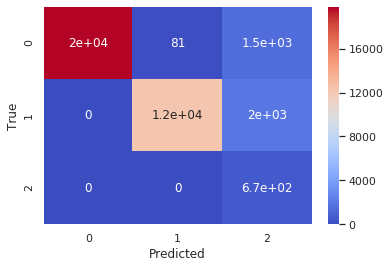

time: 299 ms


In [139]:
sns.heatmap(metrics.confusion_matrix(labels_true, labels_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')

In [140]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.8107489552618607
Mutual info score:  0.7329613444923789
Homogeneity score:  0.827262516644009
Completeness score:  0.6579872459048673
V-measure:  0.7329786527388968
Fowlkes-Mallows score:  0.9008619867770985
time: 94.1 ms


In [141]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.587135191260062
Davies-Bouldin Index:  1.173873214472352
Calinski-Harabasz Index:  41663.66344438124
time: 18.6 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


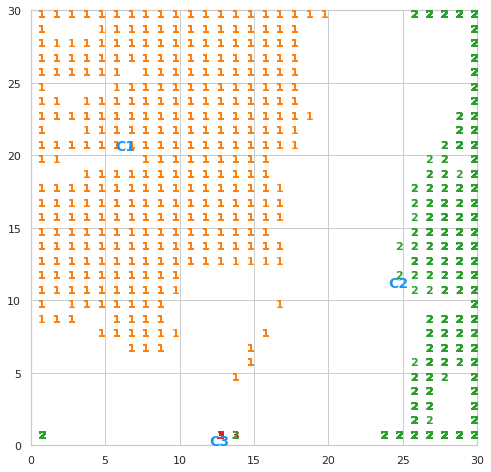

time: 1min 58s


In [142]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

##Model 2 from hyperparameters analysis

In [143]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.2
f = 'gaussian'
i = 5000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	103.10s	0.755	0.537	0.628	0.622	0.983	0.195
Confusion matrix
 [[16300     0  5093]
 [    0 12136  2151]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.76      0.86     21393
           2       1.00      0.85      0.92     14287
           3       0.08      1.00      0.16       671

    accuracy                           0.80     36351
   macro avg       0.69      0.87      0.65     36351
weighted avg       0.98      0.80      0.87     36351

time: 1min 53s


Text(30.5, 0.5, 'True')

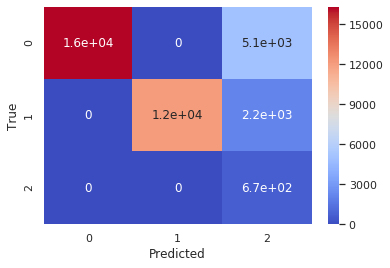

time: 281 ms


In [144]:
sns.heatmap(metrics.confusion_matrix(labels_true, labels_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')

In [145]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.622037322663096
Mutual info score:  0.627756191669672
Homogeneity score:  0.7550054354038604
Completeness score:  0.5372468971312594
V-measure:  0.6277788281367808
Fowlkes-Mallows score:  0.7910980779972955
time: 97.8 ms


In [146]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.32110945841880373
Davies-Bouldin Index:  1.5397962884660552
Calinski-Harabasz Index:  19446.895714587514
time: 18.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


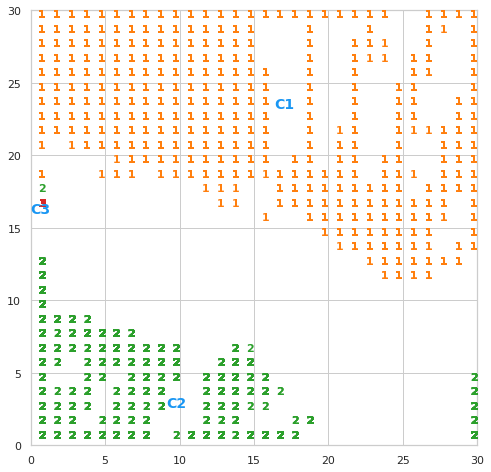

time: 1min 58s


In [147]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

##Model 3 from hyperparameters analysis

In [148]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 2
l = 0.1
f = 'triangle'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.25s	0.677	0.537	0.599	0.615	0.925	0.333
Confusion matrix
 [[17867    13  3513]
 [ 1999 12203    85]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       0.90      0.84      0.87     21393
           2       1.00      0.85      0.92     14287
           3       0.16      1.00      0.27       671

    accuracy                           0.85     36351
   macro avg       0.69      0.90      0.69     36351
weighted avg       0.92      0.85      0.88     36351

time: 1min 25s


Text(30.5, 0.5, 'True')

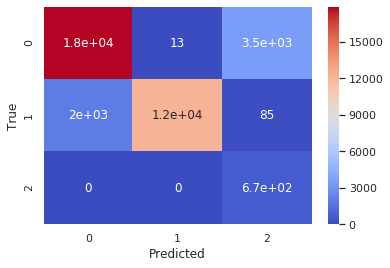

time: 277 ms


In [149]:
sns.heatmap(metrics.confusion_matrix(labels_true, labels_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')

In [150]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.6149726202549903
Mutual info score:  0.598905098419663
Homogeneity score:  0.6766945437755745
Completeness score:  0.5371980611151526
V-measure:  0.5989310675735846
Fowlkes-Mallows score:  0.7948102089850031
time: 94.8 ms


In [151]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.3247837134941018
Davies-Bouldin Index:  1.884318029991429
Calinski-Harabasz Index:  26284.304133912312
time: 18.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


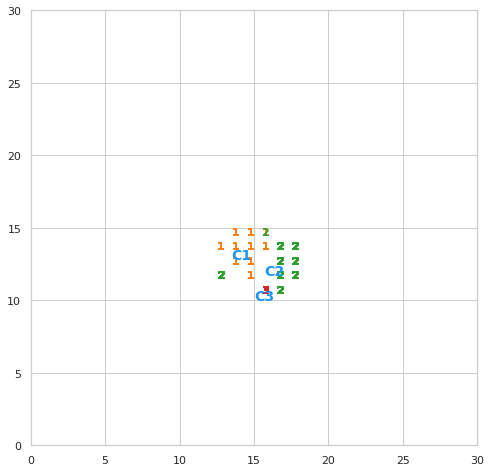

time: 1min 47s


In [152]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

##Model 4 from hyperparameters analysis

In [153]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 2
l = 0.2
f = 'triangle'
i = 500

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	70.88s	0.634	0.544	0.585	0.675	0.932	0.149
Confusion matrix
 [[19953    10  1430]
 [ 1999 11303   985]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       0.91      0.93      0.92     21393
           2       1.00      0.79      0.88     14287
           3       0.22      1.00      0.36       671

    accuracy                           0.88     36351
   macro avg       0.71      0.91      0.72     36351
weighted avg       0.93      0.88      0.90     36351

time: 1min 21s


Text(30.5, 0.5, 'True')

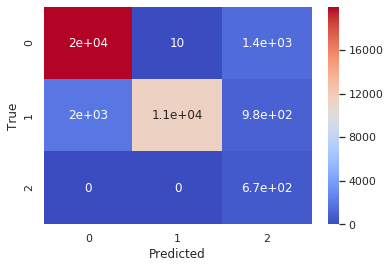

time: 276 ms


In [154]:
sns.heatmap(metrics.confusion_matrix(labels_true, labels_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')

In [155]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.6747091483524049
Mutual info score:  0.5852312832180204
Homogeneity score:  0.6336580865555322
Completeness score:  0.5437292964706445
V-measure:  0.5852593132435736
Fowlkes-Mallows score:  0.8327440310928683
time: 93.4 ms


In [156]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.39546314958401374
Davies-Bouldin Index:  1.5336260294047284
Calinski-Harabasz Index:  25241.845328985666
time: 18.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


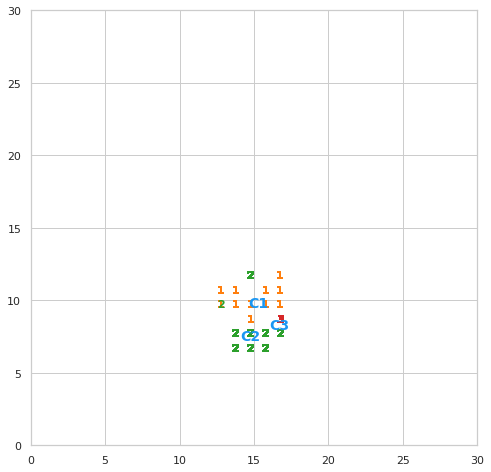

time: 1min 48s


In [157]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

##Final model (10x rounds)

In [158]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.24s	0.804	0.607	0.692	0.736	0.984	0.263
Confusion matrix
 [[18502     0  2891]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.86      0.93     21393
           2       1.00      0.86      0.92     14287
           3       0.12      1.00      0.22       671

    accuracy                           0.87     36351
   macro avg       0.71      0.91      0.69     36351
weighted avg       0.98      0.87      0.91     36351

time: 1min 25s


Text(30.5, 0.5, 'True')

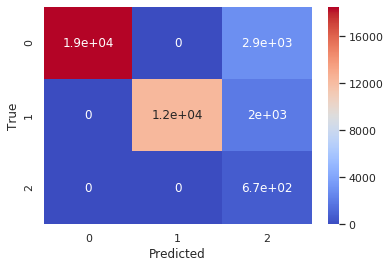

time: 291 ms


In [159]:
sns.heatmap(metrics.confusion_matrix(labels_true, labels_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')

In [160]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.736416503694243
Mutual info score:  0.6917494816623518
Homogeneity score:  0.8042783239675964
Completeness score:  0.6068740513399102
V-measure:  0.6917688740235813
Fowlkes-Mallows score:  0.858976345877007
time: 96 ms


In [161]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.5098682582889568
Davies-Bouldin Index:  1.380698005891016
Calinski-Harabasz Index:  37099.48287440751
time: 18.3 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


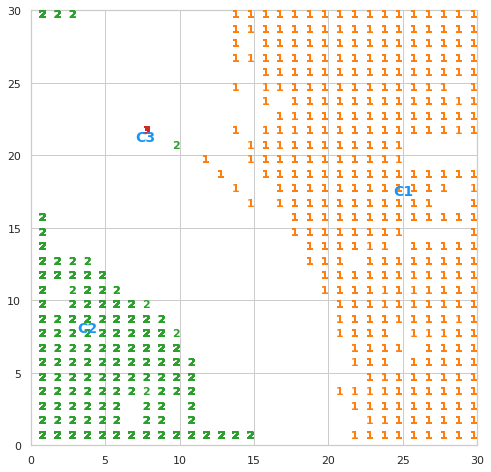

time: 1min 55s


In [162]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [163]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.68s	0.824	0.639	0.720	0.779	0.984	0.246
Confusion matrix
 [[19250     0  2143]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.90      0.95     21393
           2       1.00      0.86      0.92     14287
           3       0.14      1.00      0.24       671

    accuracy                           0.89     36351
   macro avg       0.71      0.92      0.71     36351
weighted avg       0.98      0.89      0.93     36351

time: 1min 26s


In [164]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.7794685210540288
Mutual info score:  0.7197564669722297
Homogeneity score:  0.824122569340144
Completeness score:  0.6388809685342872
V-measure:  0.7197743705472667
Fowlkes-Mallows score:  0.8834236054172843
time: 96.8 ms


In [165]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.559936106036561
Davies-Bouldin Index:  1.2457480999501536
Calinski-Harabasz Index:  40613.18244200053
time: 18.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


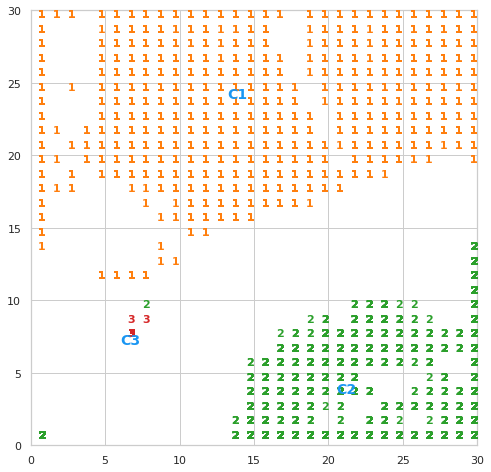

time: 1min 57s


In [166]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [167]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.89s	0.827	0.644	0.725	0.786	0.984	0.358
Confusion matrix
 [[19362     0  2031]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.91      0.95     21393
           2       1.00      0.86      0.92     14287
           3       0.14      1.00      0.25       671

    accuracy                           0.89     36351
   macro avg       0.71      0.92      0.71     36351
weighted avg       0.98      0.89      0.93     36351

time: 1min 26s


In [168]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.7862066602048178
Mutual info score:  0.7245165579812859
Homogeneity score:  0.8274952850214402
Completeness score:  0.6443597532748855
V-measure:  0.7245342018324459
Fowlkes-Mallows score:  0.887195720922601
time: 94 ms


In [169]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.5678311565921771
Davies-Bouldin Index:  1.2237035902686875
Calinski-Harabasz Index:  41187.03309516803
time: 18.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


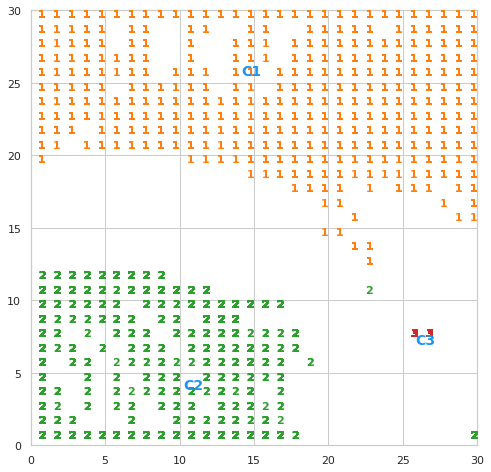

time: 1min 56s


In [170]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [171]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.20s	0.803	0.604	0.689	0.733	0.984	0.080
Confusion matrix
 [[18431     0  2962]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.86      0.93     21393
           2       1.00      0.86      0.92     14287
           3       0.12      1.00      0.21       671

    accuracy                           0.86     36351
   macro avg       0.71      0.91      0.69     36351
weighted avg       0.98      0.86      0.91     36351

time: 1min 25s


In [172]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.7325061685844322
Mutual info score:  0.6893839560898068
Homogeneity score:  0.802595995311154
Completeness score:  0.6041924018111524
V-measure:  0.68940347117307
Fowlkes-Mallows score:  0.8567256701470645
time: 96.8 ms


In [173]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.489598951005506
Davies-Bouldin Index:  1.5262244326292798
Calinski-Harabasz Index:  34514.76833837817
time: 18.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


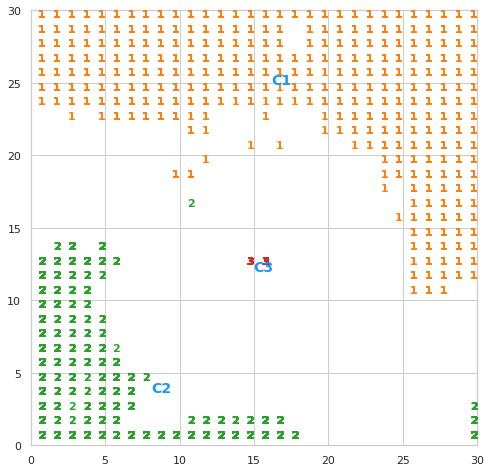

time: 1min 57s


In [174]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [175]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.45s	0.800	0.600	0.686	0.727	0.984	0.115
Confusion matrix
 [[18323     0  3070]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.86      0.92     21393
           2       1.00      0.86      0.92     14287
           3       0.12      1.00      0.21       671

    accuracy                           0.86     36351
   macro avg       0.71      0.91      0.69     36351
weighted avg       0.98      0.86      0.91     36351

time: 1min 26s


In [176]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.7266166045095681
Mutual info score:  0.6858699537882588
Homogeneity score:  0.8000931576774054
Completeness score:  0.6002161411566774
V-measure:  0.6858896503320211
Fowlkes-Mallows score:  0.8533261727702413
time: 98.5 ms


In [177]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.4820496700460492
Davies-Bouldin Index:  1.521394943252831
Calinski-Harabasz Index:  34540.58104032923
time: 18.3 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


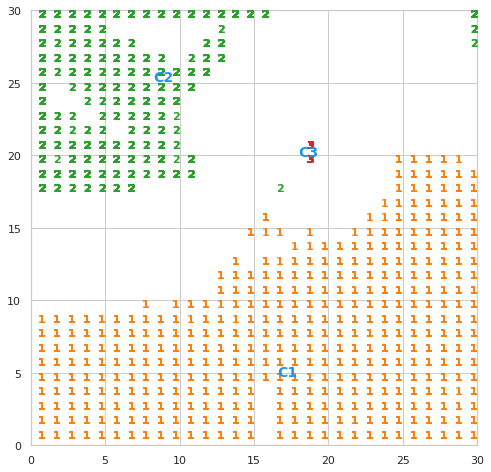

time: 2min


In [178]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [179]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	76.75s	0.769	0.564	0.651	0.681	0.983	0.221
Confusion matrix
 [[17940     2  3451]
 [    0 11691  2596]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.84      0.91     21393
           2       1.00      0.82      0.90     14287
           3       0.10      1.00      0.18       671

    accuracy                           0.83     36351
   macro avg       0.70      0.89      0.66     36351
weighted avg       0.98      0.83      0.89     36351

time: 1min 27s


In [180]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.6812797353070053
Mutual info score:  0.6506988662510954
Homogeneity score:  0.7685785064078638
Completeness score:  0.5642025993355609
V-measure:  0.6507204960215563
Fowlkes-Mallows score:  0.8269668936484977
time: 102 ms


In [181]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.48158795377489727
Davies-Bouldin Index:  1.3723607911360094
Calinski-Harabasz Index:  34985.51462869083
time: 18.3 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


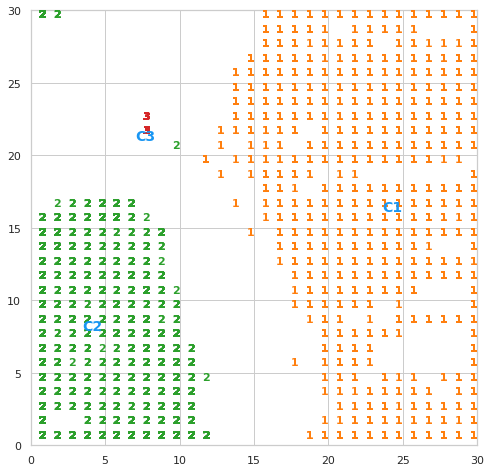

time: 1min 58s


In [182]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [183]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.37s	0.804	0.613	0.696	0.753	0.984	0.226
Confusion matrix
 [[19200     0  2193]
 [    0 11662  2625]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.90      0.95     21393
           2       1.00      0.82      0.90     14287
           3       0.12      1.00      0.22       671

    accuracy                           0.87     36351
   macro avg       0.71      0.90      0.69     36351
weighted avg       0.98      0.87      0.91     36351

time: 1min 25s


In [184]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.7527630222505338
Mutual info score:  0.6957219115756722
Homogeneity score:  0.8041617122021215
Completeness score:  0.6130827150211925
V-measure:  0.6957411669614322
Fowlkes-Mallows score:  0.8684084215388371
time: 95.8 ms


In [185]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.5384457403562821
Davies-Bouldin Index:  1.2860794851269162
Calinski-Harabasz Index:  37732.30815433805
time: 18.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


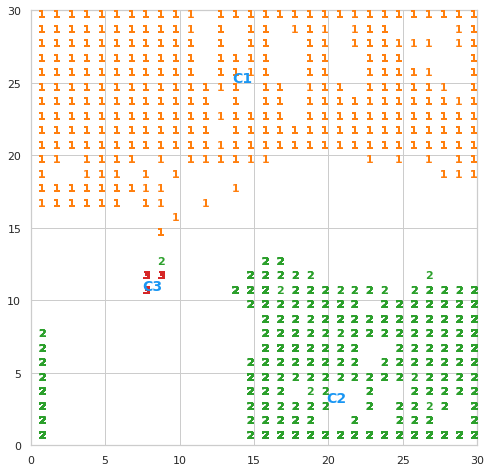

time: 1min 57s


In [186]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [187]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	74.97s	0.779	0.579	0.664	0.704	0.983	0.183
Confusion matrix
 [[18373     1  3019]
 [    0 11665  2622]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.86      0.92     21393
           2       1.00      0.82      0.90     14287
           3       0.11      1.00      0.19       671

    accuracy                           0.84     36351
   macro avg       0.70      0.89      0.67     36351
weighted avg       0.98      0.84      0.90     36351

time: 1min 25s


In [188]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.704129363443675
Mutual info score:  0.6640048549905175
Homogeneity score:  0.7790993530969266
Completeness score:  0.5785705064194798
V-measure:  0.6640257999583745
Fowlkes-Mallows score:  0.8403979524190922
time: 97.2 ms


In [189]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.4984724363691188
Davies-Bouldin Index:  1.3358185136035299
Calinski-Harabasz Index:  35975.678694015325
time: 18.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


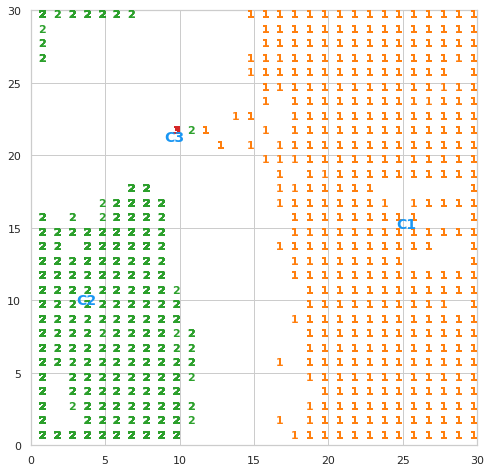

time: 1min 58s


In [190]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [191]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	76.10s	0.832	0.652	0.731	0.796	0.984	0.074
Confusion matrix
 [[19515     0  1878]
 [    0 12288  1999]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.91      0.95     21393
           2       1.00      0.86      0.92     14287
           3       0.15      1.00      0.26       671

    accuracy                           0.89     36351
   macro avg       0.72      0.92      0.71     36351
weighted avg       0.98      0.89      0.93     36351

time: 1min 26s


In [192]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.795534319327906
Mutual info score:  0.7313050386305342
Homogeneity score:  0.8323120995779846
Completeness score:  0.6521881209405835
V-measure:  0.7313223086895297
Fowlkes-Mallows score:  0.8923938012250529
time: 96.6 ms


In [193]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.5772068835542986
Davies-Bouldin Index:  1.2058115610277207
Calinski-Harabasz Index:  41708.586676492
time: 18.6 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


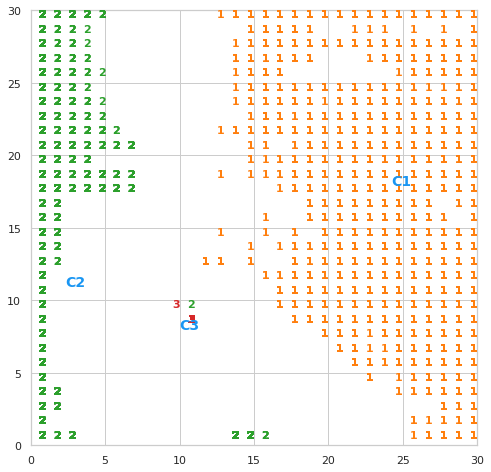

time: 1min 59s


In [194]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [195]:
coord = []
cent1X,cent1Y,cent2X,cent2Y,cent3X,cent3Y  = None,None,None,None,None,None

s = 10
l = 0.5
f = 'gaussian'
i = 1000

t0 = time()
coord,arr1,arr2,arr3,cat1,cat2,cat3,cent1X,cent1Y,cent2X, cent2Y,cent3X, cent3Y,som = run(30,30,columnsNum, s, l, f, i, data)
t1 = time()
labels_true = []
labels_pred = []
generateInfo()
printResults(report=True,id=id, t1=t1, t0=t0,coord=coord, numCat=numCat,labels_pred=labels_pred, labels_true=labels_true)

gaussian,0.5,10,5000	75.59s	0.820	0.640	0.719	0.788	0.983	0.314
Confusion matrix
 [[19587    26  1780]
 [    0 11987  2300]
 [    0     0   671]]
Classification report
               precision    recall  f1-score   support

           1       1.00      0.92      0.96     21393
           2       1.00      0.84      0.91     14287
           3       0.14      1.00      0.25       671

    accuracy                           0.89     36351
   macro avg       0.71      0.92      0.70     36351
weighted avg       0.98      0.89      0.93     36351

time: 1min 26s


In [196]:
print('\033[1m'+'Clustering metrics - supervised'+'\033[0m')
print('Adjusted Rand score: ', metrics.adjusted_rand_score(labels_true, labels_pred))
print('Mutual info score: ', metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print('Homogeneity score: ', metrics.homogeneity_score(labels_true, labels_pred))
print('Completeness score: ', metrics.completeness_score(labels_true, labels_pred))
print('V-measure: ', metrics.v_measure_score(labels_true, labels_pred))
print('Fowlkes-Mallows score: ', metrics.fowlkes_mallows_score(labels_true, labels_pred))

Clustering metrics - supervised
Adjusted Rand score:  0.7877728242970765
Mutual info score:  0.7189635087093825
Homogeneity score:  0.8203793094986878
Completeness score:  0.639891760270347
V-measure:  0.7189815251595953
Fowlkes-Mallows score:  0.8881085811878665
time: 103 ms


In [197]:
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels_pred, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels_pred))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels_pred))

Clustering metrics - unsupervised
Silhouette:  0.41014690335809617
Davies-Bouldin Index:  1.8309195494970876
Calinski-Harabasz Index:  21972.32169980258
time: 18.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


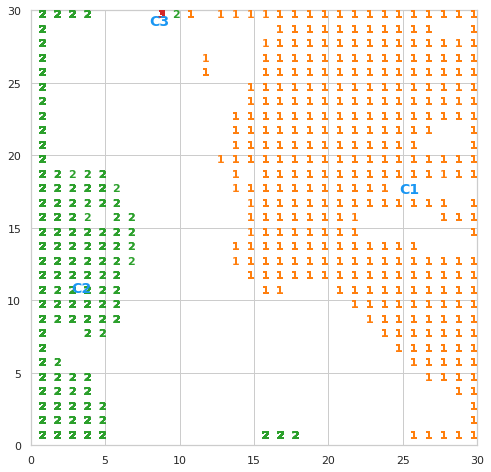

time: 1min 58s


In [198]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, numCat):  
    w = som.winner(x)
    wmap[w] = im#

    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab20(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt. text(cent1X,  cent1Y,  str("C1"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent2X,  cent2Y,  str("C2"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt. text(cent3X,  cent3Y,  str("C3"),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 14})
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

# 4. Comparison of all models and scenarios

- tables on excel (metrics analysis)

- analyze all results and what changes for each metric, each cluster x category, and conclude what should be done when using this technique, if it should be used, how it can be improved, etc --> paper

- heatmaps in small format separately